## Decision Tree Regression Homework Solution

### Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from matplotlib import pyplot as plt
from tabulate import tabulate

In [3]:
df = pd.read_csv("../../data/melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df.dropna(axis=0, how='any', subset=None, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

In [8]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

In [9]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,0,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,0,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,0,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,0,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,0,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [12]:
features = ['Rooms', 'Type', 'Bathroom', 'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude']
X = df[features]

In [13]:
y = df['Price']

## Build decision tree regression model

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [16]:
y_pred = regressor.predict(x_test)
y_pred

array([ 579000., 1975000., 1230000., ...,  990000.,  240000.,  491000.])

In [17]:
y_test

6048      620000.0
9186     2320000.0
3991      750000.0
5829     1120000.0
3616     6500000.0
           ...    
10215     430000.0
7526      810000.0
6690      781500.0
2719      282000.0
1323      501000.0
Name: Price, Length: 1240, dtype: float64

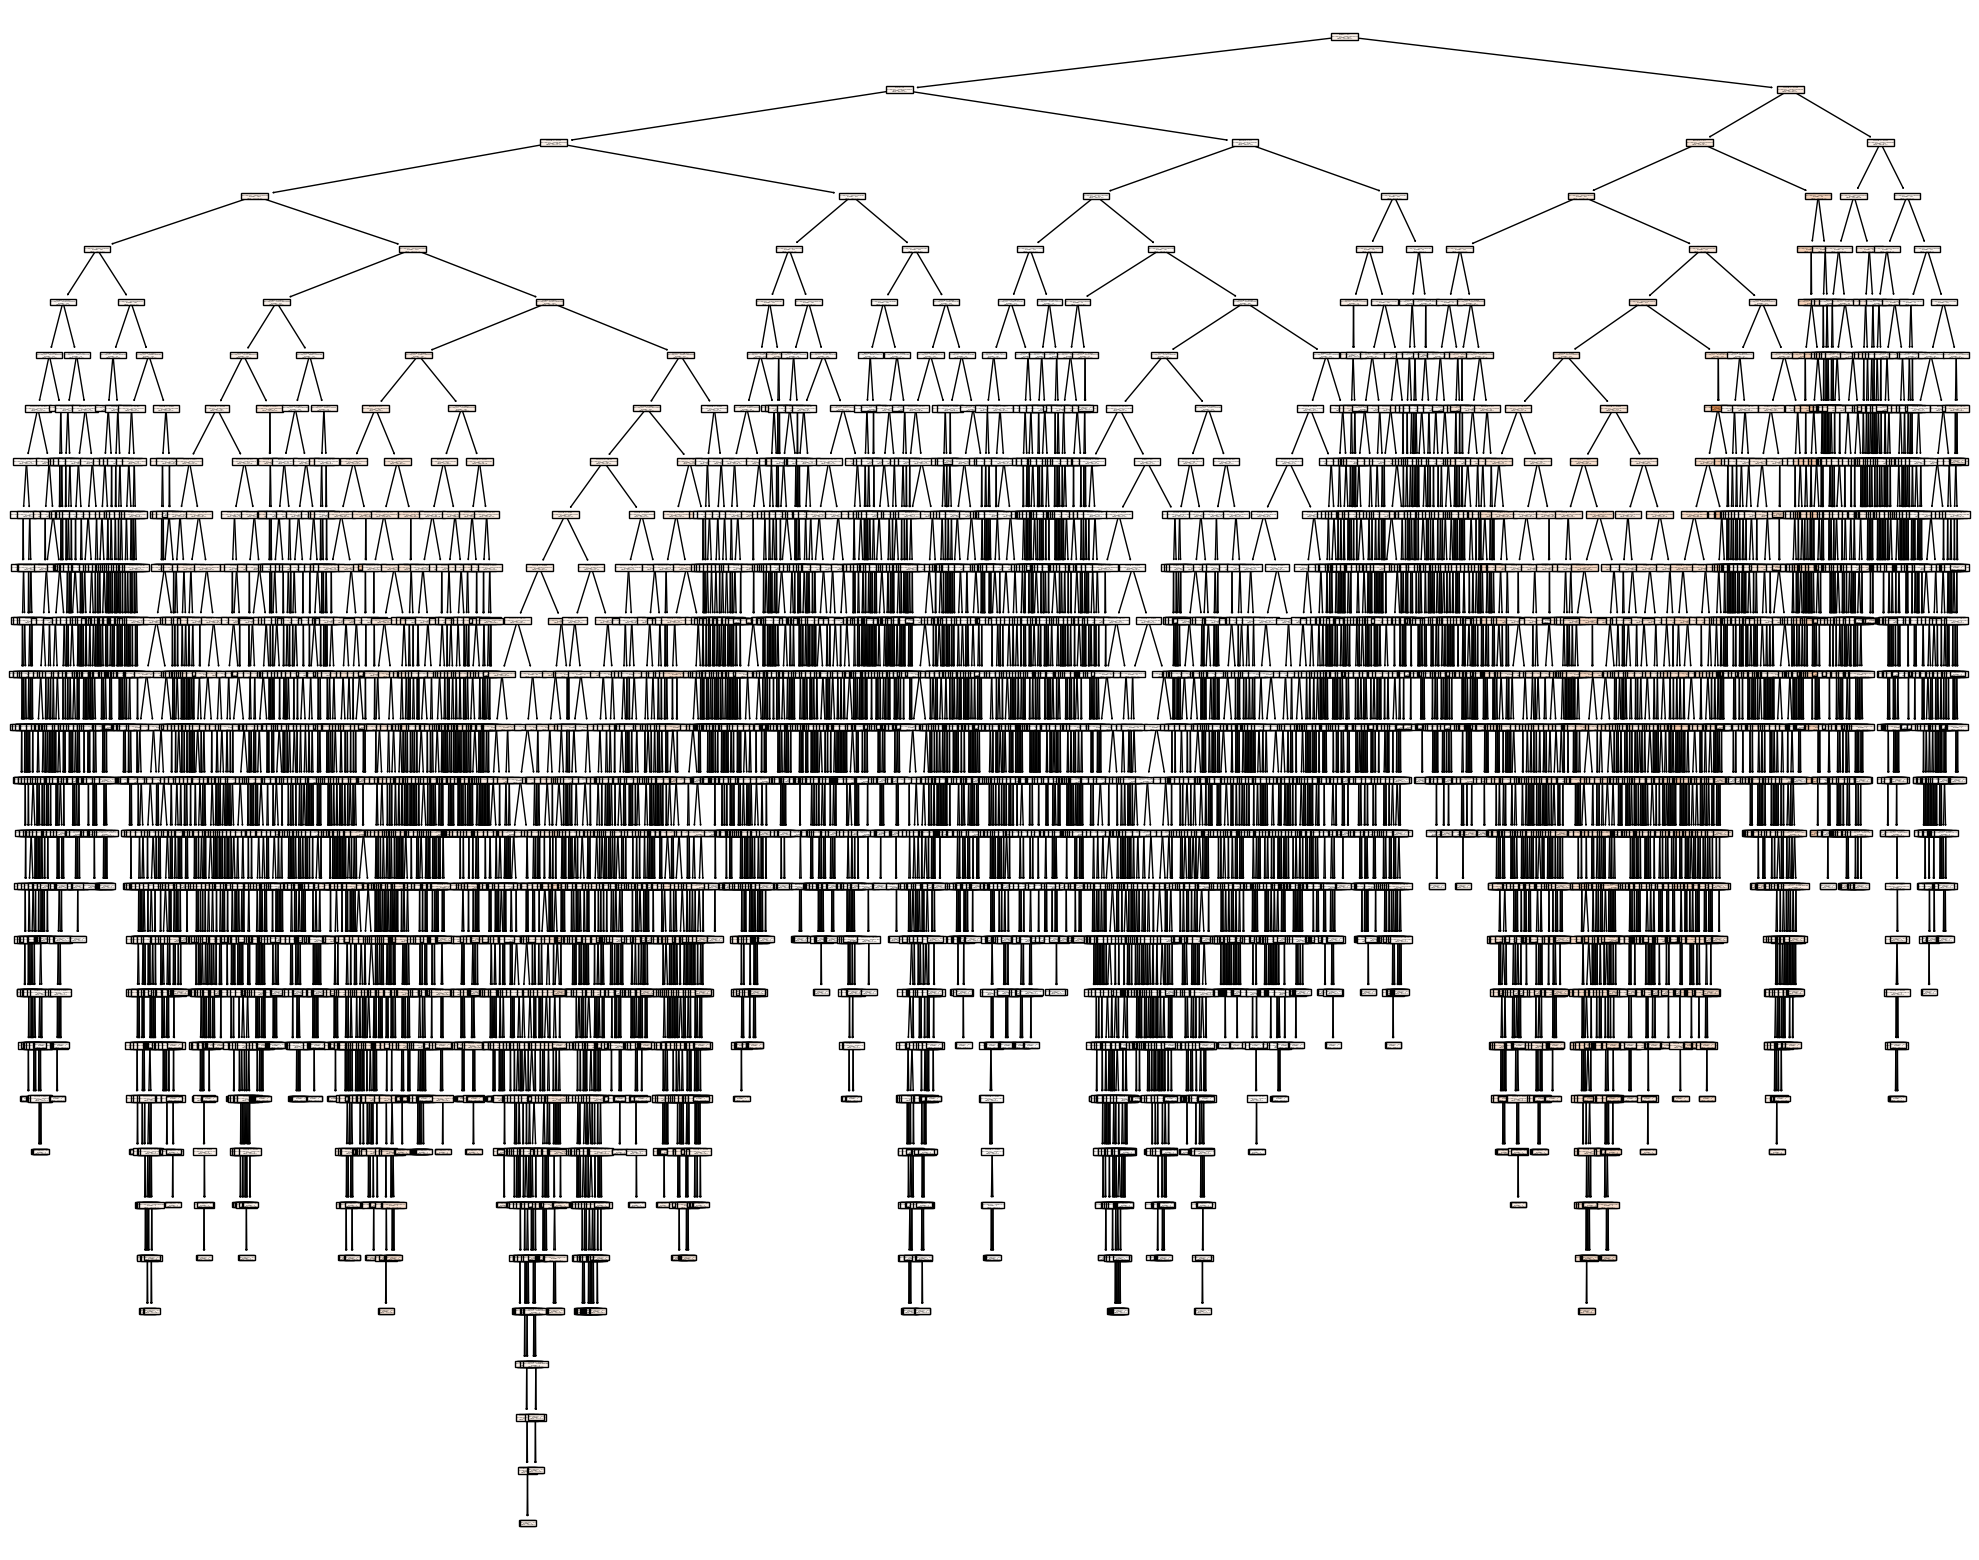

In [18]:
fig_Tree = plt.figure(figsize=(25, 20))
treeOne = tree.plot_tree(regressor,
                         feature_names=features,
                         filled=True)

In [19]:
fig_Tree.savefig("decision_tree.png")

In [20]:
data = [["r2_score", r2_score(y_test, y_pred)],
        ["mean_squared_error", mean_squared_error(y_test, y_pred)],
        ["mean_absolute_percentage_error", mean_absolute_percentage_error(y_test, y_pred)],
        ["score", regressor.score(x_test, y_pred)]]
col_names = [" ", "Trained Model"]

#display table
print(tabulate(data, headers=col_names))

                                  Trained Model
------------------------------  ---------------
r2_score                            0.641304
mean_squared_error                  1.59795e+11
mean_absolute_percentage_error      0.210483
score                               1


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14],
    'max_features': [None, 'auto', 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

regressor = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

regressor.fit(x_train, y_train)
print(regressor.best_params_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}


In [22]:
regressor_optimal = DecisionTreeRegressor(
    max_depth=10,
    criterion='friedman_mse',
    max_features='auto',
    splitter='best',
    random_state=0)
regressor_optimal.fit(x_train, y_train)
y_pred_optimal = regressor_optimal.predict(x_test)

/Users/tejaspatel/IdeaProjects/test-notebook/venv/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


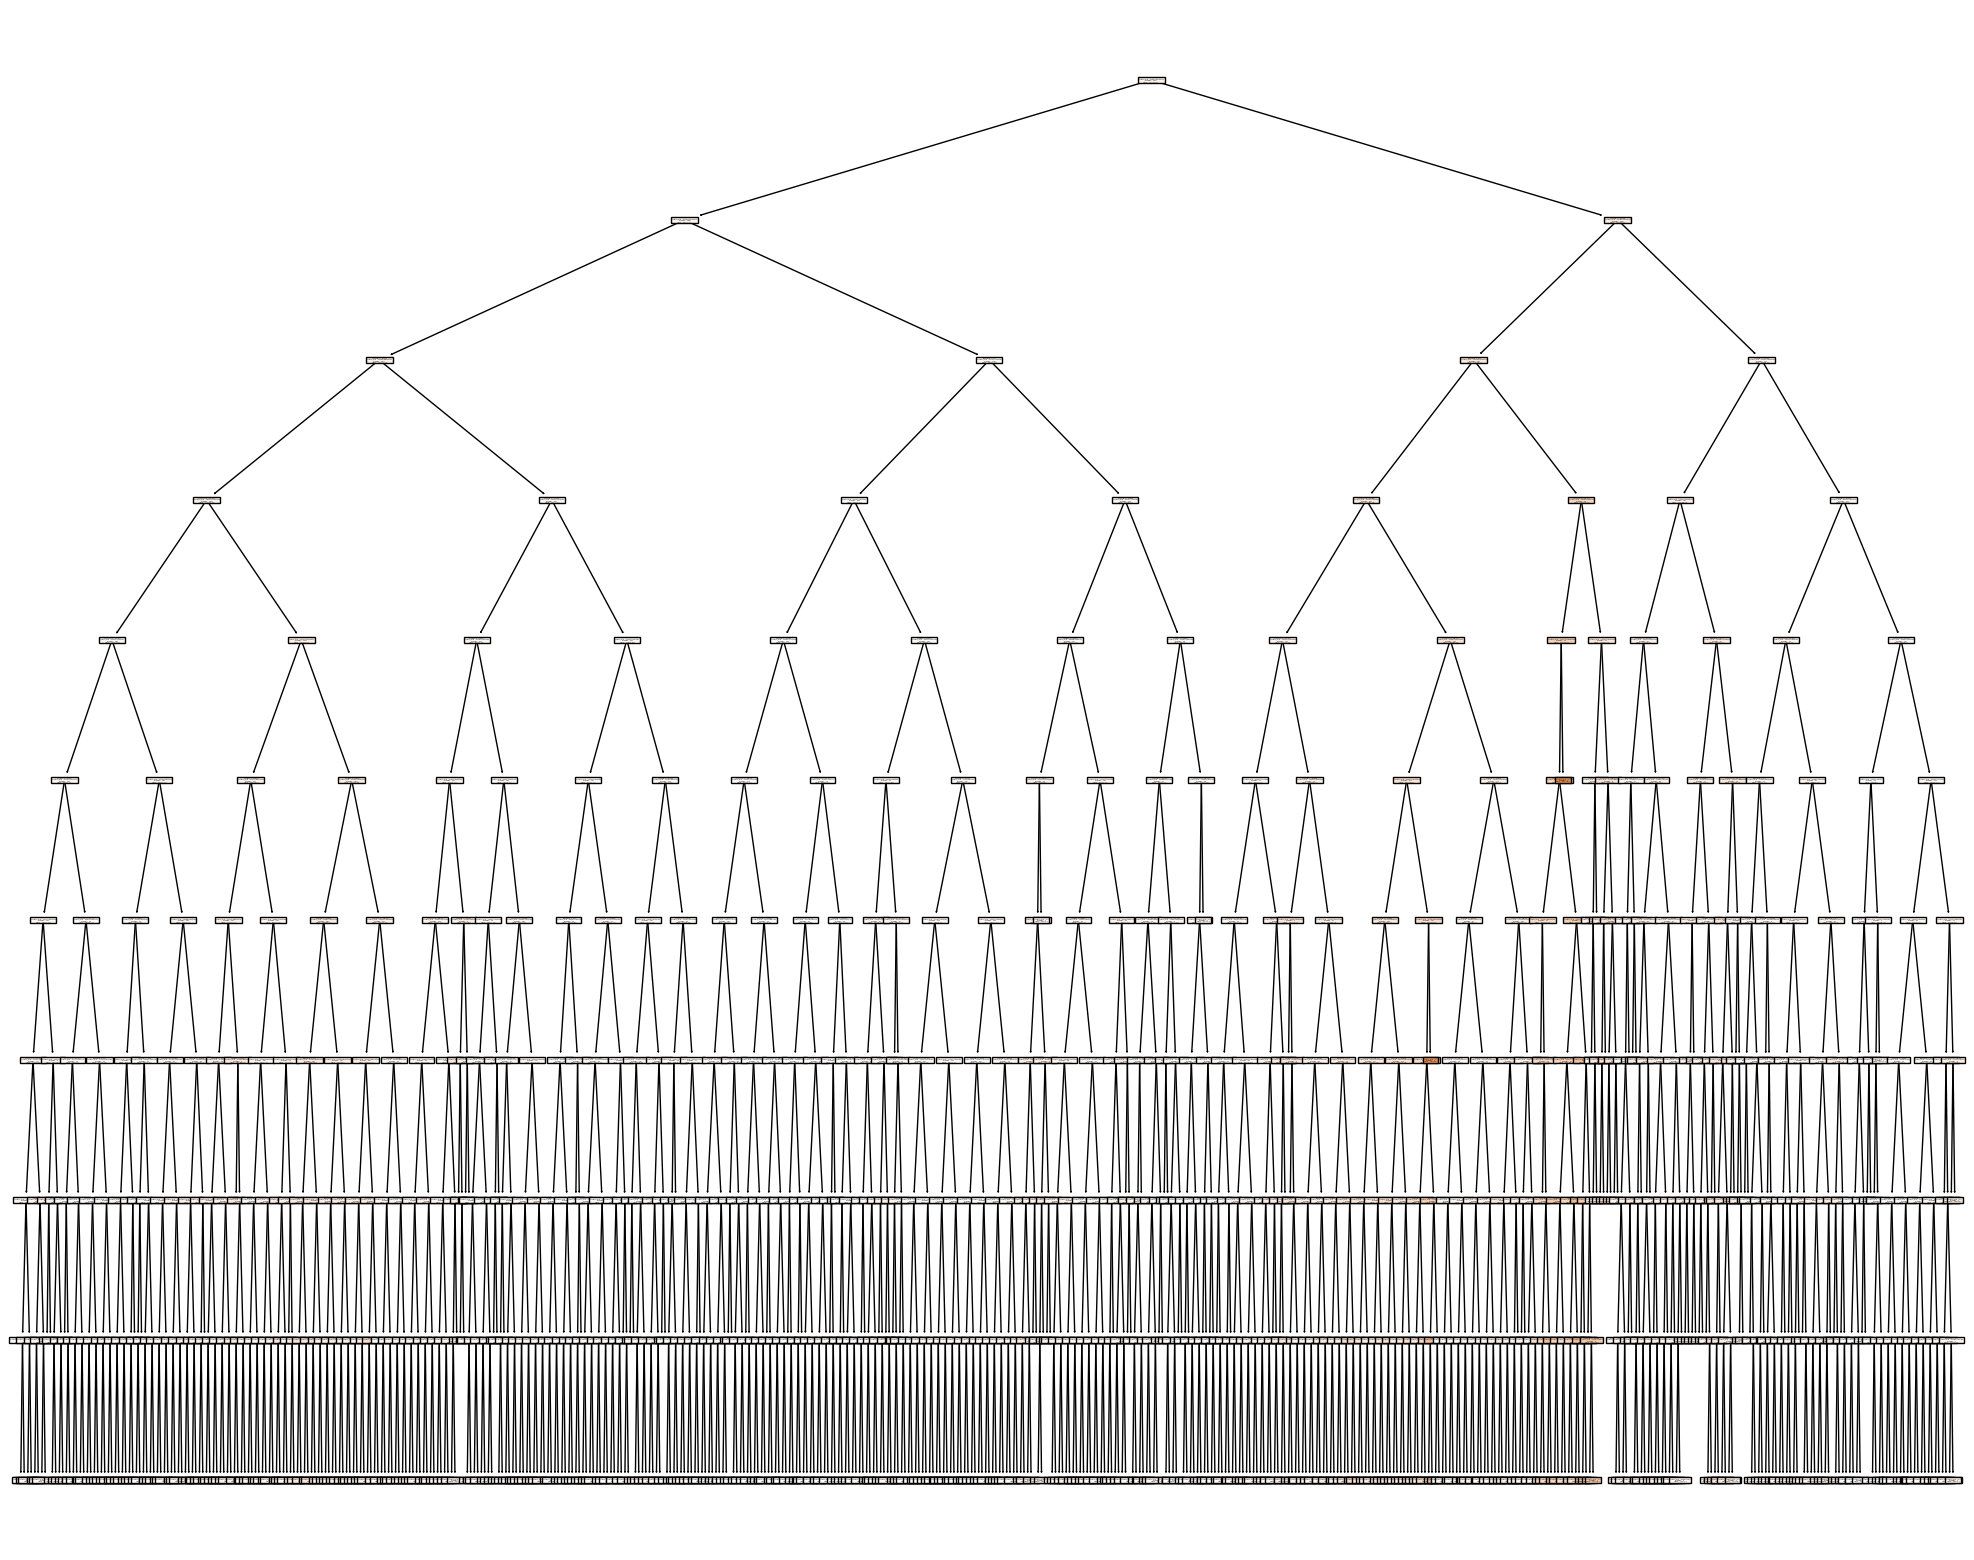

In [23]:
fig_Tree1 = plt.figure(figsize=(25, 20))
treeTwo = tree.plot_tree(
    regressor_optimal,
    feature_names=features,
    filled=True)

In [24]:
fig_Tree1.savefig("decision_tree_optimal.png")

### Comparing the results of the two models

In [25]:
data = [["r2_score", r2_score(y_test, y_pred), r2_score(y_test, y_pred_optimal)],
        ["mean_squared_error", mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_optimal)],
        ["mean_absolute_percentage_error", mean_absolute_percentage_error(y_test, y_pred),
         mean_absolute_percentage_error(y_test, y_pred_optimal)],
        ]
col_names = [" ", "Trained Model", "Optimal Model"]
print(tabulate(data, headers=col_names))

                                  Trained Model    Optimal Model
------------------------------  ---------------  ---------------
r2_score                            0.641304          0.683741
mean_squared_error                  1.59795e+11       1.4089e+11
mean_absolute_percentage_error      0.210483          0.20568
